## Reading the data and importing required libraries

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## Formating Dataset as required

In [83]:
path = "Electricity Bill.xlsx"
df = pd.read_excel(path, engine='openpyxl')

In [84]:
df.columns

Index(['Unnamed: 0', 'Bill Month', 'Consumption', 'Status', 'Bill Amount',
       'Prompt payment Dt', 'Due Date', 'Unnamed: 7', 'Unnamed: 8',
       'Bill Month.1', 'Consumption.1', 'Status.1', 'Bill Amount.1',
       'Prompt payment Dt.1', 'Due Date.1', 'Unnamed: 15'],
      dtype='object')

In [85]:
df = df[['Consumption', 'Bill Amount', 'Bill Month.1', 'Consumption.1', 'Bill Amount.1']]

In [86]:
df['Consumption'] = df['Consumption'] + df['Consumption.1']
df['Bill Amount'] = df['Bill Amount'] + df['Bill Amount.1']

In [87]:
df = df[['Bill Month.1', 'Consumption', 'Bill Amount']]

In [88]:
df.rename(columns={'Bill Month.1': 'Date', 
                   'Consumption': 'Consumed Units',
                   'Bill Amount': 'Total Price'}, inplace = True)

In [89]:
df.iloc[9]['Consumed Units'] = 300

<ipython-input-89-e077ec4c5ad3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[9]['Consumed Units'] = 300


In [90]:
df['Unit Price'] = df['Total Price']/df['Consumed Units']

In [91]:
df

,Date,Consumed Units,Total Price,Unit Price
0,2021-03-01,356,3420,9.606742
1,2021-02-01,335,3150,9.402985
2,2021-01-01,334,3130,9.371257
3,2020-12-01,333,3140,9.429429
4,2020-11-01,458,4410,9.628821
5,2020-10-01,391,3670,9.386189
6,2020-09-01,332,3100,9.337349
7,2020-08-01,407,3740,9.189189
8,2020-07-01,423,3610,8.534279
9,2020-06-01,2020,15490,7.668317


In [92]:
df.to_csv('electricity-bill.csv')

In [97]:
df = pd.read_csv('electricity-bill.csv', index_col = 0)

## Format the  date column with pandas to_datetime() funtion

In [98]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Consumed Units,Total Price,Unit Price
0,2021-03-01,356,3420,9.606742
1,2021-02-01,335,3150,9.402985
2,2021-01-01,334,3130,9.371257
3,2020-12-01,333,3140,9.429429
4,2020-11-01,458,4410,9.628821
5,2020-10-01,391,3670,9.386189
6,2020-09-01,332,3100,9.337349
7,2020-08-01,407,3740,9.189189
8,2020-07-01,423,3610,8.534279
9,2020-06-01,300,15490,7.668317


## Create new data frame by splitting date column into month and year 
(Dataframe -> month, year, consumed_units, unit_price, total_price)

In [99]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [100]:
df = df[[ 'Month', 'Year', 'Consumed Units', 'Unit Price', 'Total Price']]

In [101]:
df['Month-names'] = ['March 2021', 'Feb 2021', 'Jan 2021', 'Dec 2020', 'Nov 2020', 'Oct 2020',
                     'Sep 2020', 'Aug 2020', 'Jul 2020', 'Jun 2020', 'May 2020', 'Apr 2020']                     

## Visualize your monthly electric bill with matplotlib

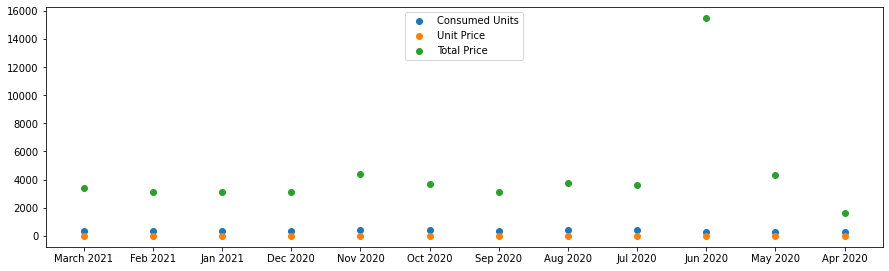

In [125]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
plt.scatter(df['Month-names'], df['Consumed Units'])
plt.scatter(df['Month-names'], df['Unit Price'])
plt.scatter(df['Month-names'], df['Total Price'])
plt.legend(['Consumed Units', 'Unit Price', 'Total Price'], loc = 'upper center')

## Predict the electric bill for 2021 first cycle using  Regression. 

In [126]:
df.columns

Index(['Month', 'Year', 'Consumed Units', 'Unit Price', 'Total Price',
       'Month-names'],
      dtype='object')

In [127]:
train_set = df[['Month', 'Year', 'Consumed Units', 'Unit Price']]
test_set = df['Total Price']

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_set, test_set, test_size=0.2, random_state=101)

In [130]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(train_set, test_set)

LinearRegression()

In [132]:
print(lm.intercept_)

5058242.524847605


In [133]:
coeff_df = pd.DataFrame(lm.coef_,train_set.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Month,-134.801887
Year,-2498.415314
Consumed Units,-10.390136
Unit Price,-200.022122


In [135]:
predlinreg = lm.predict(X_test)

In [141]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predlinreg))
print('MSE:', metrics.mean_squared_error(y_test, predlinreg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predlinreg)))

MAE: 3543.202944226563
MSE: 30366421.37153214
RMSE: 5510.573597324705


In [142]:
lm.score(X_test, y_test)

0.07084043096016912